# Immigration
## Southwest border encounters

## CBP data portal

CBP newsroom: [current stats](https://www.cbp.gov/newsroom/stats)

CBP newsroom: [historical stats](https://www.cbp.gov/newsroom/stats)

---

### Southwest land border encounters
Sources for chart:
[FY2019-2022](https://www.cbp.gov/newsroom/stats/southwest-land-border-encounters-fy22) | 
[FY2022-2025](https://www.cbp.gov/newsroom/stats/southwest-land-border-encounters)

* See also, Pew research: [Border encounters fell sharply in 2024](https://www.pewresearch.org/short-reads/2024/10/01/migrant-encounters-at-u-s-mexico-border-have-fallen-sharply-in-2024/)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import afp_style as style
plt.style.use('https://storage.googleapis.com/datanode/afpchart.mplstyle')

In [2]:
# Load data
df22 = pd.read_csv('data/sbo-encounters-fy19-fy22.csv')
df25 = pd.read_csv('data/sbo-encounters-fy22-fy25-nov.csv')

In [3]:
# Drop everything from Fiscal Year 2022 in FY22-25 data so no overlap
df25 = df25.query('`Fiscal Year` != "2022"')

In [4]:
df25.head()

,Fiscal Year,Month Grouping,Month (abbv),Component,Demographic,Citizenship Grouping,Title of Authority,Encounter Type,Encounter Count
636,2023,Remaining,APR,Office of Field Operations,Accompanied Minors,El Salvador,Title 42,Expulsions,2
637,2023,Remaining,APR,Office of Field Operations,Accompanied Minors,Guatemala,Title 42,Expulsions,6
638,2023,Remaining,APR,Office of Field Operations,Accompanied Minors,Guatemala,Title 8,Inadmissibles,1
639,2023,Remaining,APR,Office of Field Operations,Accompanied Minors,Honduras,Title 42,Expulsions,4
640,2023,Remaining,APR,Office of Field Operations,Accompanied Minors,Honduras,Title 8,Inadmissibles,1


In [5]:
# Join dataframes
df = pd.concat([df22, df25])

In [6]:
df.head()

,Fiscal Year,Month Grouping,Month (abbv),Component,Demographic,Citizenship Grouping,Title of Authority,Encounter Type,Encounter Count
0,2019,FYTD,AUG,Office of Field Operations,Accompanied Minors,Guatemala,Title 8,Inadmissibles,0.0
1,2019,FYTD,DEC,U.S. Border Patrol,FMUA,Honduras,Title 8,Apprehensions,9584.0
2,2021,FYTD,SEP,Office of Field Operations,Single Adults,Other,Title 8,Inadmissibles,1108.0
3,2021,FYTD,SEP,Office of Field Operations,Single Adults,Guatemala,Title 8,Inadmissibles,14.0
4,2019,FYTD,JUN,Office of Field Operations,Single Adults,Honduras,Title 8,Inadmissibles,87.0


In [7]:
# Order of months in a US fiscal year
months = ['OCT','NOV',
          'DEC','JAN','FEB','MAR',
        'APR','MAY','JUN','JUL','AUG', 'SEP']

In [8]:
# Create a new column with the month in the order of a US fiscal year
df['Month'] = pd.CategoricalIndex(df['Month (abbv)'], ordered=True, categories=months)


In [9]:
df['Fiscal Year'] = df['Fiscal Year'].replace('2025 (FYTD)', '2025').astype(int)

In [10]:
# Make pivot table
dfp = df.pivot_table(index=['Fiscal Year','Month'], values='Encounter Count', aggfunc='sum') \
   .sort_values(by=['Fiscal Year','Month'])

In [11]:
dfp.head(12)

Encounter Count
Fiscal Year Month                 
2019        OCT            60781.0
            NOV            62469.0
            DEC            60794.0
            JAN            58317.0
            FEB            76545.0
            MAR           103731.0
            APR           109415.0
            MAY           144116.0
            JUN           104311.0
            JUL            81777.0
            AUG            62707.0
            SEP            52546.0

In [12]:
# Copy to clipboard
dfp.to_clipboard()

In [13]:
# Reimport after manually shifting fiscal year to calendar year 
# (move year start from October to following January)
dff = pd.read_csv('data/sbo-encounters-2019-2024.csv')

In [14]:
dff.head()

,Year,Month,Encounter Count
0,2019,JAN,58317.0
1,2019,FEB,76545.0
2,2019,MAR,103731.0
3,2019,APR,109415.0
4,2019,MAY,144116.0


In [15]:
# Make column combining year and month
dff['Date'] = pd.to_datetime(dff['Year'].astype('str') + '-' + dff['Month'], format='%Y-%b')

In [16]:
dff.head()

,Year,Month,Encounter Count,Date
0,2019,JAN,58317.0,2019-01-01
1,2019,FEB,76545.0,2019-02-01
2,2019,MAR,103731.0,2019-03-01
3,2019,APR,109415.0,2019-04-01
4,2019,MAY,144116.0,2019-05-01


In [17]:
type(dff.Date[0])

pandas._libs.tslibs.timestamps.Timestamp

/Users/cfaife/Documents/MATERIALS/Data/inauguration_charts/afp_style.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:,.0f}'.format(t) for t in yticks])


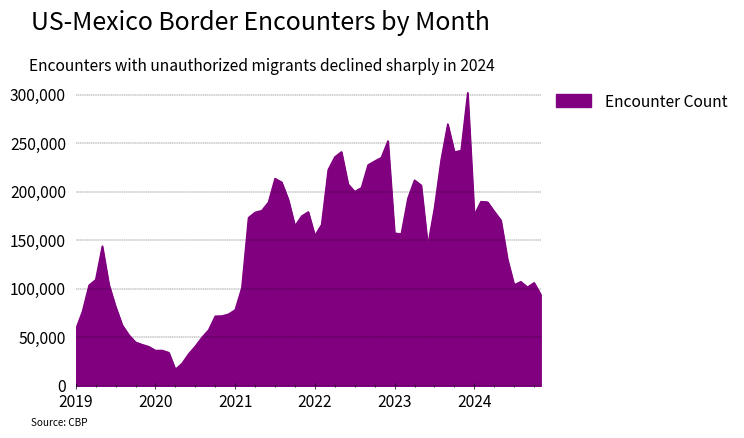

In [18]:
import matplotlib.dates as mdates

chart = dff.plot(x='Date', 
                 y='Encounter Count', 
                 kind='area', 
                 color='purple')

style.style_plot(plt,
                 title='US-Mexico Border Encounters by Month',
                 subtitle='Encounters with unauthorized migrants declined sharply in 2024',
                 source='CBP')

plt.savefig('BorderEncounters.svg')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/Users/cfaife/Documents/MATERIALS/Data/inauguration_charts/afp_style.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:,.0f}'.format(t) for t in yticks])


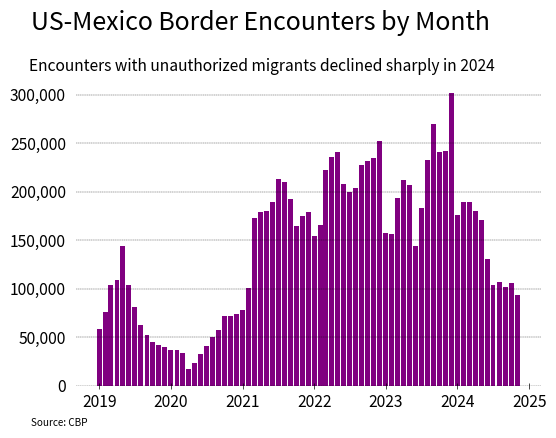

In [19]:
# We could also do a bar chart version?

fig, ax = plt.subplots()

ax.bar(dff.Date, dff['Encounter Count'], 
        color='purple',
        width=25)

style.style_plot(plt,
                 title='US-Mexico Border Encounters by Month',
                 subtitle='Encounters with unauthorized migrants declined sharply in 2024',
                 source='CBP')

# plt.savefig('BorderEncounters.svg')

In [21]:
# Get most recent value
dff.iloc[-1]

Year                              2024
Month                              NOV
Encounter Count                94190.0
Date               2024-11-01 00:00:00
Name: 70, dtype: object

In [31]:
# Get max value with date
dff.iloc[
    dff[dff['Encounter Count'] == dff['Encounter Count'].max()].index[0]
]

Year                              2023
Month                              DEC
Encounter Count               301981.0
Date               2023-12-01 00:00:00
Name: 59, dtype: object